In [10]:
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
import numpy as np

%matplotlib inline

### Problem 1
1) Find an extrema of the function $f(x)=0.25x^4-x^3+2$ analitically.  
2) In order to check the solution draw the graph.  
3) Use *scipy.optimize.minimize* to find minima starting from point $x=-1.5$ (set the parameter *method* = BFGS). Is it good solution of the problem? Why?  
4) Change initial point by $x=1.5$. Is this result better?

In [2]:
def f(x):
    return (0.25*x**4-x**3+2)

In [3]:
inputs = [x for x in np.arange(-2, 4, 0.01)]
y = [f(x) for x in inputs]

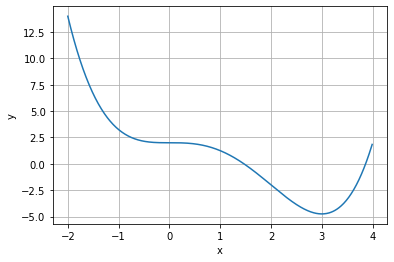

In [4]:
plt.plot(inputs, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
minimize(f, -1.5, method="BFGS")

      fun: 2.0000000021683753
 hess_inv: array([[60.73492039]])
      jac: array([-5.03659248e-06])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 14
     njev: 15
   status: 0
  success: True
        x: array([-0.00129419])

In [6]:
minimize(f, 1.5, method="BFGS")

      fun: -4.7499999999999964
 hess_inv: array([[0.11116603]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([2.99999997])

### Problem 2
1) Find the gradient of the function $z(x,y)=e^y(x^2+y^2+2x-7)$.  
2) Implement the gradient descent algorithm by hand. Check how it works.

In [7]:
def func(x,y):
    return (math.exp(y)*(x**2+y**2+2*x-7))

In [8]:
func(1,0)

-4.0

In [9]:
def grad(x,y):
    return math.exp(y)*(2*x+2), math.exp(y)*(x**2+y**2+2*x+2*y-7)

In [10]:
grad(-1,2) # check the validity

(0.0, 0.0)

In [11]:
def GD(initial, alpha, diff):
    x_prev, y_prev = initial[0], initial[1]
    error = diff + 1
    n_iter = 0
    while error > diff:
        x_next, y_next = x_prev - alpha*grad(x_prev, y_prev)[0], y_prev - alpha*grad(x_prev, y_prev)[1]
        error = abs(func(x_next, y_next) - func(x_prev, y_prev))
        x_prev, y_prev = x_next, y_next
        n_iter += 1
    return [x_prev, y_prev], func(x_prev, y_prev), n_iter

In [12]:
result = GD([-2,3], 0.01, 0.0001)
print ("Point of minimum: ", (round(result[0][0],2), round(result[0][1],2)), 
       "\nMin = ", round(result[1],2), "\nN iterations = ", result[2])

Point of minimum:  (-1.01, 2.0) 
Min =  -29.56 
N iterations =  32


### Derivatives

In [1]:
from sympy import *

In [2]:
x = Symbol('x')
y = x**2 + exp(x**2)
y_der = y.diff(x)
y_der

2*x*exp(x**2) + 2*x

In [4]:
x, y = symbols('x y')
z = exp(y)*(x**2 + y**2 +2*x -7)
z_der_x = z.diff(x)
z_der_y = z.diff(y)
print(z_der_x)
print(z_der_y)

(2*x + 2)*exp(y)
2*y*exp(y) + (x**2 + 2*x + y**2 - 7)*exp(y)


In [17]:
z_der_x.evalf(subs={x: 3, y: 2})

59.1124487914452

### Exercise

Find derivative of function $f(x)=x^4+ln(x)-3x+1$ by hand and plot graphs for $x\in[0,2]$ of both derivative and the function itself

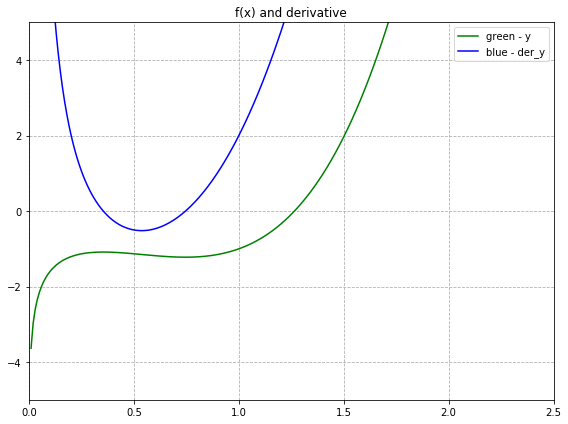

In [33]:
import math
def f(x):
    return x**4 + math.log(x) - 3*x + 1
x = [x for x in np.arange(0, 3, 0.01) if x != 0]
y = [f(arg) for arg in x]
y_der = [4 * arg**3 + 1/arg - 3 for arg in x]
plt.figure(figsize=(8,6))
plt.plot(x, y, 'g-', label="green - y")
plt.plot(x, y_der, 'b-', label="blue - der_y")
plt.title("f(x) and derivative")
plt.xlim(0, 2.5)
plt.ylim(-5, 5)
plt.grid(linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()